In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Distribuzioni teoriche di $\theta_x$ e di $\theta_y$

* $\displaystyle f_{\theta, \phi}(\theta, \phi) = \frac{n+1}{2\pi}{\cos}^n\theta \sin \theta$
* $\displaystyle f_{\theta_x, \theta_y}(\theta_x, \theta_y) = \frac{n+1}{2\pi} \frac{1}{{\left({\tan}^2\theta_x + {\tan}^2\theta_y + 1 \right)}^{\left(n+3\right)/2} \, {\cos}^2 \theta_x {\cos}^2 \theta_y}$
* $\displaystyle f_{\theta_{x,y}}\left(\theta_{x,y}\right) = C \frac{1}{\left( 1 + {\tan}^2 \theta_{x,y}\right)^{\left( n +1 \right)/2} \, {\cos}^2 \theta_{x,y}}$

In [28]:
def f(x,y,n):
    return (n+1)/2*np.pi/np.sqrt((np.tan(x)**2+np.tan(y)**2+1)**(n+3))/np.cos(x)**2/np.cos(y)**2
def f2(x,y):
    return f(x,y,2)
c = 1.0
def f_marg(x, n):
    return c/(1+np.tan(x)**2)**((n+1)/2)/np.cos(x)**2

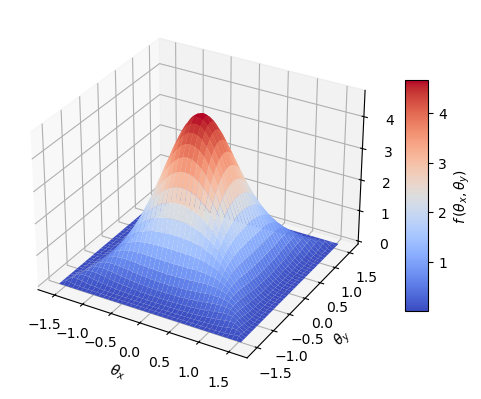

In [19]:
ran = (-np.pi/2, np.pi/2)
x, y = np.meshgrid(np.linspace(*ran, 201), np.linspace(*ran, 201))
z = f2(x, y)
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x, y, z, cmap = 'coolwarm')
ax.set(xlabel = r'$\theta_x$', ylabel = r'$\theta_y$')
fig.colorbar(surf, shrink=0.5, aspect=10, label = r'$f \, (\theta_x, \theta_y)$')
plt.show()

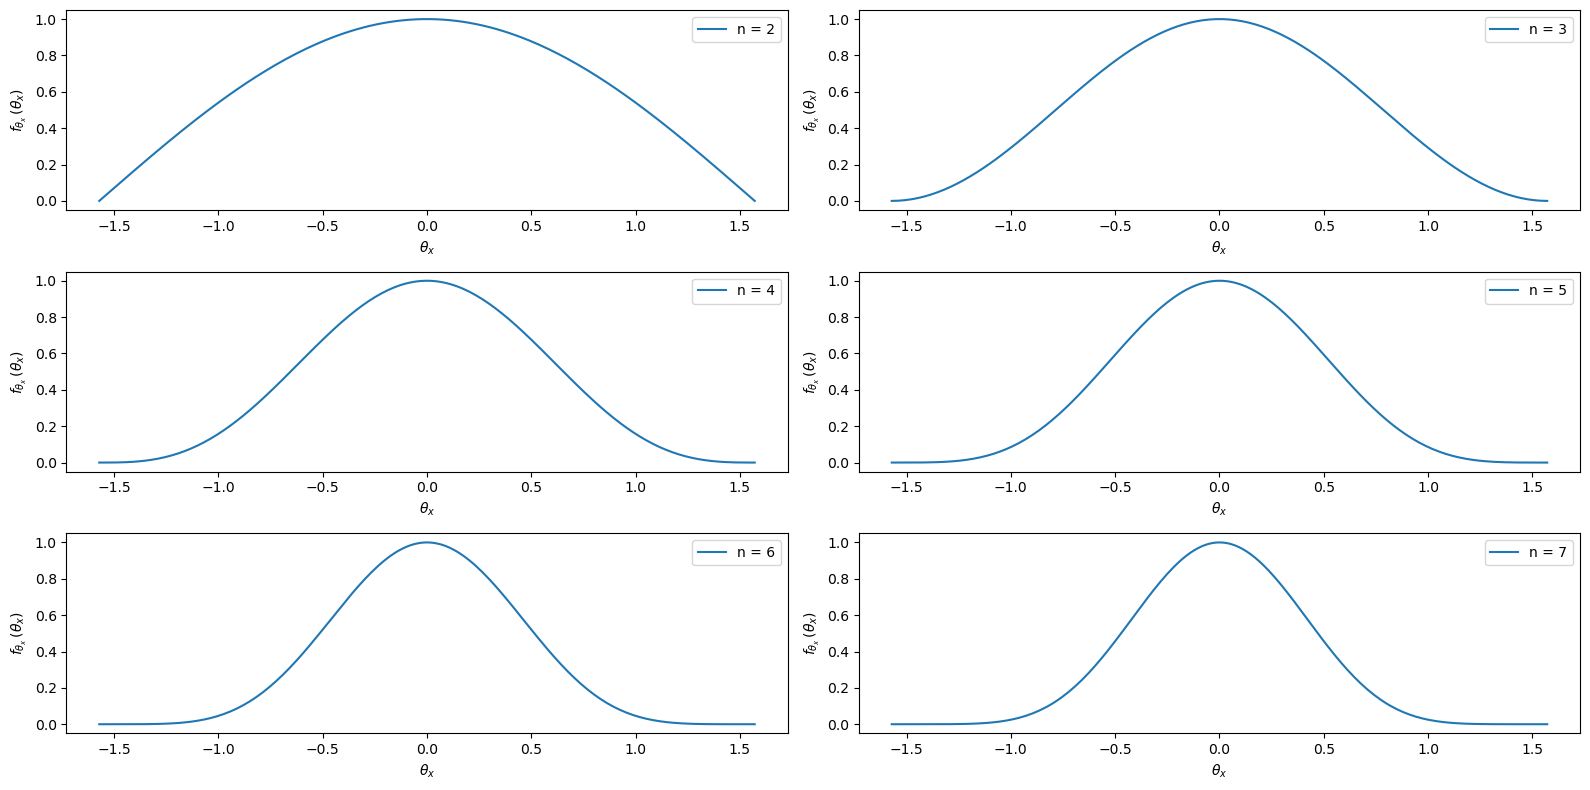

In [59]:
fig, axs = plt.subplots(3, 2, figsize = (16, 8))
xs = np.linspace(*ran, 201)
for n, ax in zip(range(2, 8), axs.reshape(-1)):
    fs = f_marg(xs, n)
    ax.plot(xs, fs, label = 'n = {}'.format(n))
    ax.set_xlabel(r'$\theta_x$')
    ax.set_ylabel(r'$f_{\theta_x} \, (\theta_x)$')
    ax.legend()
plt.tight_layout()
plt.show()

### Analisi dei picchi

In [59]:
df = pd.read_csv('data')
df

,Unnamed: 0,event_id,time,theta_x,theta_y
0,0,ST42C6,13:35:15,-8.89,-6.42
1,1,ST42C7,13:35:41,-7.60,0.00
2,2,ST42C8,13:36:06,-0.55,-2.48
3,3,ST42C9,13:40:15,-31.76,-13.77
4,4,ST42CA,13:40:40,23.59,0.00
...,...,...,...,...,...
4454612,4454612,ST1163,23:58:07,-10.17,-4.31
4454613,4454613,ST1164,23:58:27,-10.26,2.53
4454614,4454614,ST1165,23:59:21,-22.97,-5.27
4454615,4454615,ST1166,23:59:56,-30.47,13.76


In [93]:
theta_x = df.theta_x
theta_y = df.theta_y
x0, y0 = theta_x[theta_y==0], theta_y[theta_x==0]
xp29, yp29 = theta_x[theta_y==29.74], theta_y[theta_x==29.74]
xn29, yn29 = theta_x[theta_y==-29.75], theta_y[theta_x==-29.75]

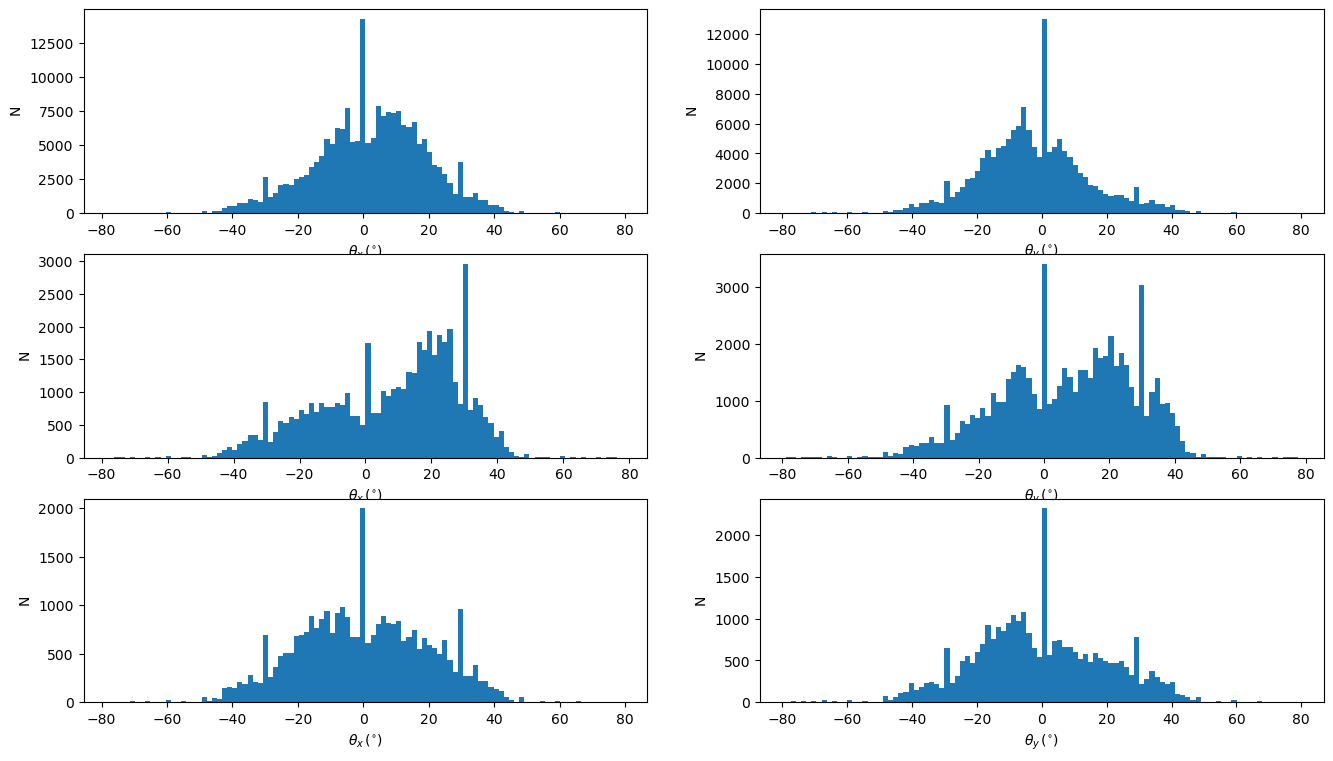

In [95]:
fig, ax = plt.subplots(3, 2, figsize = (16, 9)) 
nbins = 100
data_x0, bins_x0, p_x0 = ax[0,0].hist(x0, nbins)
ax[0,0].set_xlabel(r'$\theta_x \, (^{\circ})$')
ax[0,0].set_ylabel(r'$\mathrm{N}$')
data_y0, bins_y0, p_y0 = ax[0,1].hist(y0, nbins)
ax[0,1].set_xlabel(r'$\theta_y \, (^{\circ})$')
ax[0,1].set_ylabel(r'$\mathrm{N}$')
data_xp29, bins_xp29, p_xp29 = ax[1,0].hist(xp29, nbins)
ax[1,0].set_xlabel(r'$\theta_x \, (^{\circ})$')
ax[1,0].set_ylabel(r'$\mathrm{N}$')
data_yp29, bins_yp29, p_yp29 = ax[1,1].hist(yp29, nbins)
ax[1,1].set_xlabel(r'$\theta_y \, (^{\circ})$')
ax[1,1].set_ylabel(r'$\mathrm{N}$')
data_xn29, bins_xn29, p_xn29 = ax[2,0].hist(xn29, nbins)
ax[2,0].set_xlabel(r'$\theta_x \, (^{\circ})$')
ax[2,0].set_ylabel(r'$\mathrm{N}$')
data_yn29, bins_yn29, p_yn29 = ax[2,1].hist(yn29, nbins)
ax[2,1].set_xlabel(r'$\theta_y \, (^{\circ})$')
ax[2,1].set_ylabel(r'$\mathrm{N}$')
plt.show()